## PCA Personal Cheat Sheet



In [36]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA



- Data from wine dataset
- 13 columns containing infos

![image](wine_column_info.png)

In [16]:
# Importing Data

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

df = pd.read_csv(data_url, header=None)

df.shape


(178, 14)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
# Define X and Y
# X is ALL VARIABLES
# Y is the LABEL
# This is for supervised learning

X, Y = df.iloc[:,1:], df.iloc[:,0]


In [12]:
#Split the Data
#REMEMBER, SPLIT FIRST BEFORE NORMALIZING

#stratify is so that the in train set, the distribution of values is the same
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 0)


In [14]:
#Normalize the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled.shape


(54, 13)

In [17]:
#Checking the mean for X_train

np.mean(X_train)

1      13.033548
2       2.353790
3       2.384919
4      19.801613
5      99.088710
6       2.324839
7       2.064113
8       0.368065
9       1.640887
10      5.089597
11      0.954194
12      2.619355
13    754.822581
dtype: float64

In [25]:
#Checking the mean of the normalized data
#if not in dataframe, it will average everything. Since it was an array

#df2 = pd.DataFrame(X_train_scaled)
#df2
#np.mean(df2)

In [26]:
# Calculating the Covariance

covariance_matrix = np.cov(X_train_scaled.T) # <-- The Transpose is important, as np.cov normally uses rows as feature identification

covariance_matrix.shape


(13, 13)

In [29]:
#Computing Eigenvalues and Eigenvectors

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

eigenvalues # <-- is the lambda, the one which is multiplied by x and y

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

In [30]:
eigenvectors[:,0] # <--- choose the rows first, the the column. This is the first eigenvector


array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651])

In [31]:
#Checking if the two multiplication is the same

eigenvalues[0] * eigenvectors[:,0]

np.dot(covariance_matrix, eigenvectors[:,0])

array([-0.6646289 ,  1.19733616, -0.12325558,  1.00218234, -0.74755436,
       -1.90692551, -2.02112491,  1.48056749, -1.48518993,  0.36582417,
       -1.57937726, -1.78508543, -1.43682565])

In [32]:
eigenvalues[0] * eigenvectors[:,0]

array([-0.6646289 ,  1.19733616, -0.12325558,  1.00218234, -0.74755436,
       -1.90692551, -2.02112491,  1.48056749, -1.48518993,  0.36582417,
       -1.57937726, -1.78508543, -1.43682565])

In [34]:
#2nd Testing
np.dot(covariance_matrix, eigenvectors[:,1])
#eigenvalues[1] * eigenvectors[:,1]

#PROVEN

array([ 1.21534439,  0.39833285,  0.59087448, -0.27428896,  0.70003148,
        0.12273656, -0.05526265,  0.21862328,  0.02017943,  1.32827186,
       -0.50051411, -0.60165138,  0.91864363])

In [35]:
eigenvalues.shape

(13,)

## Compute the Explained Variance

$$\frac{\lambda_{i}}{\sum_{i}^{d}\lambda_{i}}$$

In [41]:
tot = sum(eigenvalues)

#Notice the for loop for below
variance_explained = [(eig_val/tot)
                        for eig_val in sorted(eigenvalues, reverse=True)]

#The represents how many percentages of variance for each variable is described
np.array(variance_explained)*100

array([36.9514686 , 18.43492706, 11.81515909,  7.33425176,  6.42210782,
        5.05172448,  3.95465389,  2.64391832,  2.38931926,  1.62961377,
        1.38002112,  1.17222624,  0.82060857])

In [44]:
cum_variance_explained = np.cumsum(variance_explained)

cum_variance_explained

array([0.36951469, 0.55386396, 0.67201555, 0.74535807, 0.80957914,
       0.86009639, 0.89964293, 0.92608211, 0.9499753 , 0.96627144,
       0.98007165, 0.99179391, 1.        ])

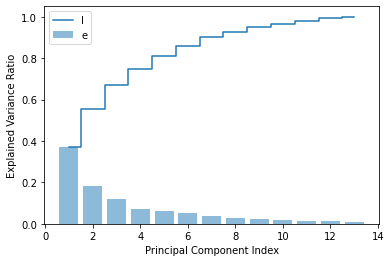

In [56]:
#Plot in a histogram

plt.bar(range(1,14), variance_explained, alpha = 0.5, align= 'center', label="individual explained variance")
plt.step(range(1,14), cum_variance_explained, where= 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend('left')